In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

## Get the data

In [2]:
df = pd.read_csv('../../../datasets/parte1/dataset_cleaned.csv')

In [3]:
df.columns
df.shape

(140787, 23)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int64  
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    140787 non-null  float64
 5   Sunshine       140787 non-null  float64
 6   WindGustDir    140787 non-null  int64  
 7   WindGustSpeed  140787 non-null  float64
 8   WindDir9am     140787 non-null  int64  
 9   WindDir3pm     140787 non-null  int64  
 10  WindSpeed9am   140787 non-null  float64
 11  WindSpeed3pm   140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-nul

In [5]:
for column in df.select_dtypes(include=['object']).columns:
    unique_values_count = df[column].value_counts()
    print(f"Column: {column}\n{unique_values_count}\n")

In [6]:
print(df.describe())

            Location        MinTemp        MaxTemp       Rainfall  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       23.720074      12.184854      23.235090       2.349974   
std        14.233401       6.393226       7.106739       8.465173   
min         0.000000      -8.500000      -4.800000       0.000000   
25%        11.000000       7.600000      17.900000       0.000000   
50%        24.000000      12.000000      22.700000       0.000000   
75%        36.000000      16.800000      28.200000       0.800000   
max        48.000000      33.900000      48.100000     371.000000   

         Evaporation       Sunshine    WindGustDir  WindGustSpeed  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        5.187367       7.621352       7.728199      39.974705   
std         3.196637       2.741407       4.508587      13.131804   
min         0.000000       0.000000       0.000000       6.000000   
25%         4.000000       7.6111

In [7]:
print(df.isna().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64


<Axes: xlabel='Temp3pm', ylabel='Count'>

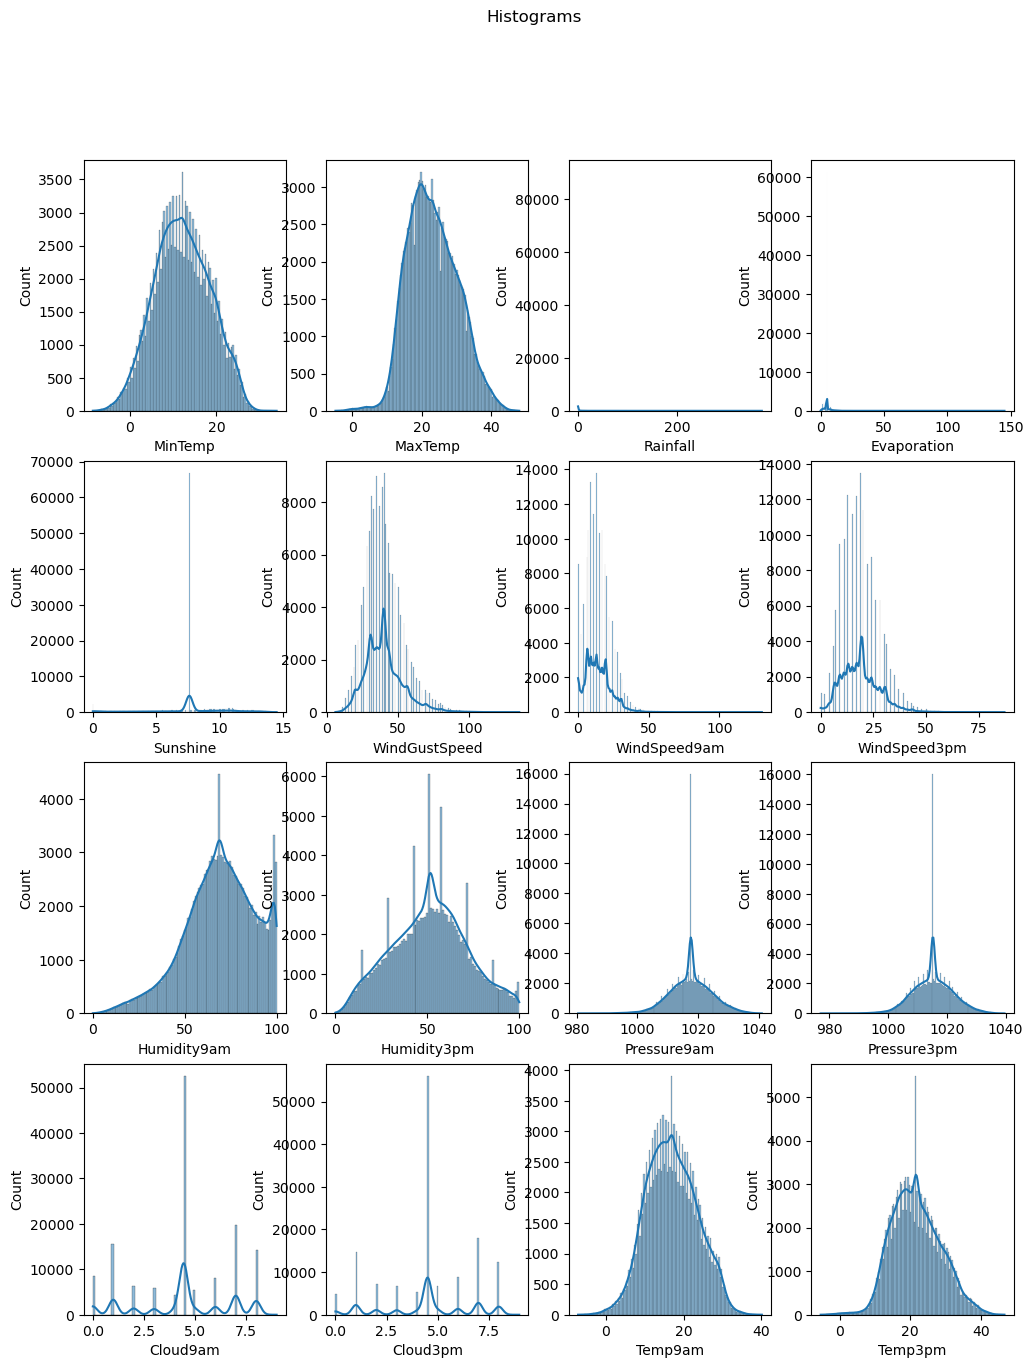

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["MinTemp"], ax=axs[0,0], kde=True)
sns.histplot(df["MaxTemp"], ax=axs[0,1], kde=True)
sns.histplot(df["Rainfall"], ax=axs[0,2], kde=True)
sns.histplot(df["Evaporation"], ax=axs[0,3], kde=True)
sns.histplot(df["Sunshine"], ax=axs[1,0], kde=True)
sns.histplot(df["WindGustSpeed"], ax=axs[1,1], kde=True)
sns.histplot(df["WindSpeed9am"], ax=axs[1,2], kde=True)
sns.histplot(df["WindSpeed3pm"], ax=axs[1,3], kde=True)
sns.histplot(df["Humidity9am"], ax=axs[2,0], kde=True)
sns.histplot(df["Humidity3pm"], ax=axs[2,1], kde=True)
sns.histplot(df["Pressure9am"], ax=axs[2,2], kde=True)
sns.histplot(df["Pressure3pm"], ax=axs[2,3], kde=True)
sns.histplot(df["Cloud9am"], ax=axs[3,0], kde=True)
sns.histplot(df["Cloud3pm"], ax=axs[3,1], kde=True)
sns.histplot(df["Temp9am"], ax=axs[3,2], kde=True)
sns.histplot(df["Temp3pm"], ax=axs[3,3], kde=True)

<Axes: >

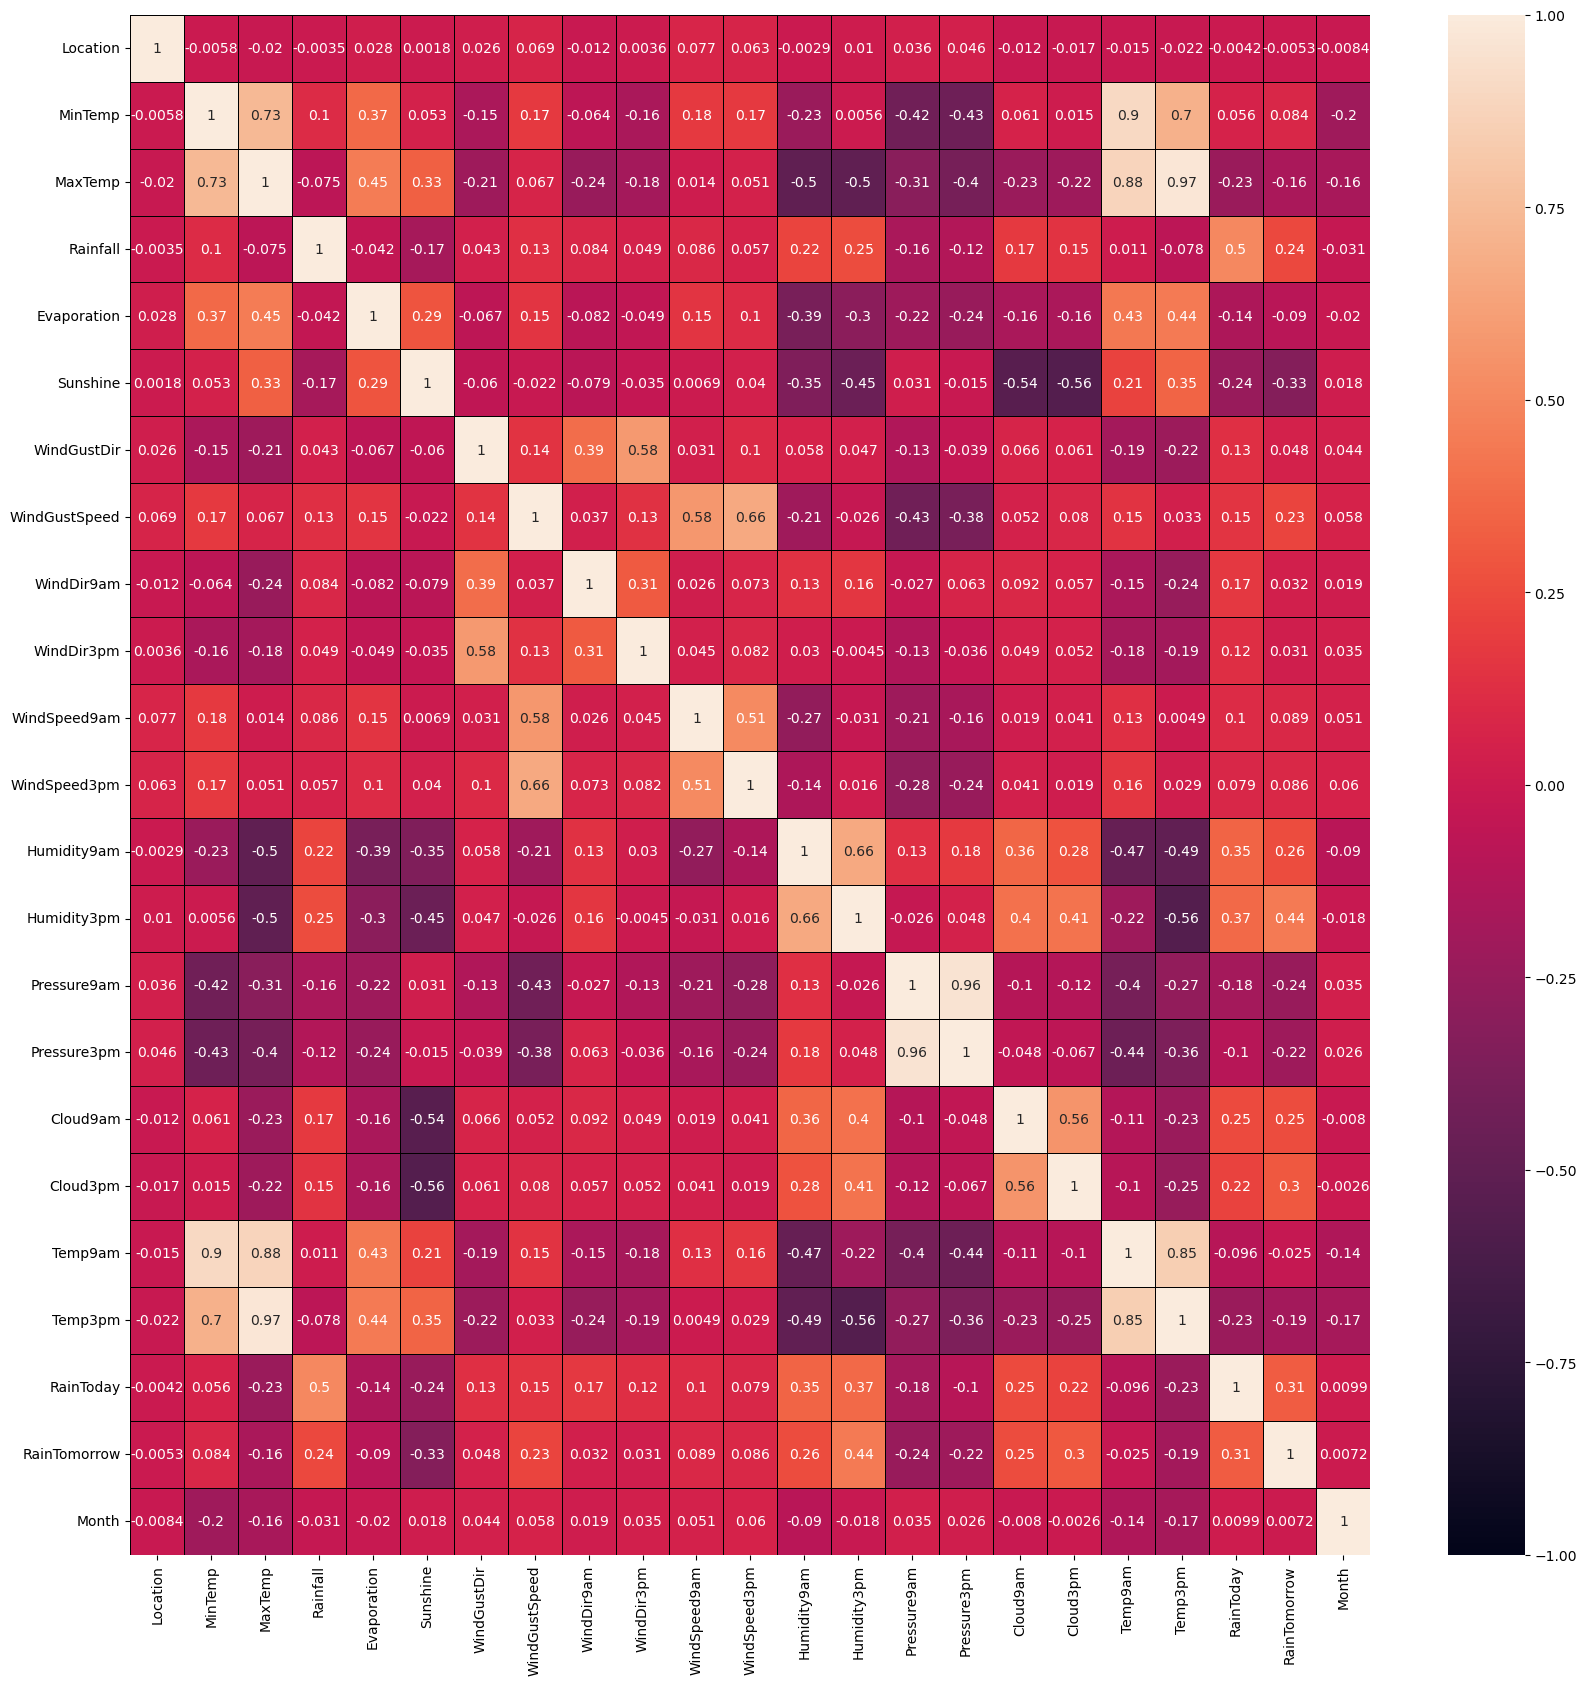

In [9]:
fig = plt.figure(figsize=(20, 20))
corr = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, linecolor='black', linewidths=0.5, annot=True, vmin=-1, vmax=1)

<Axes: >

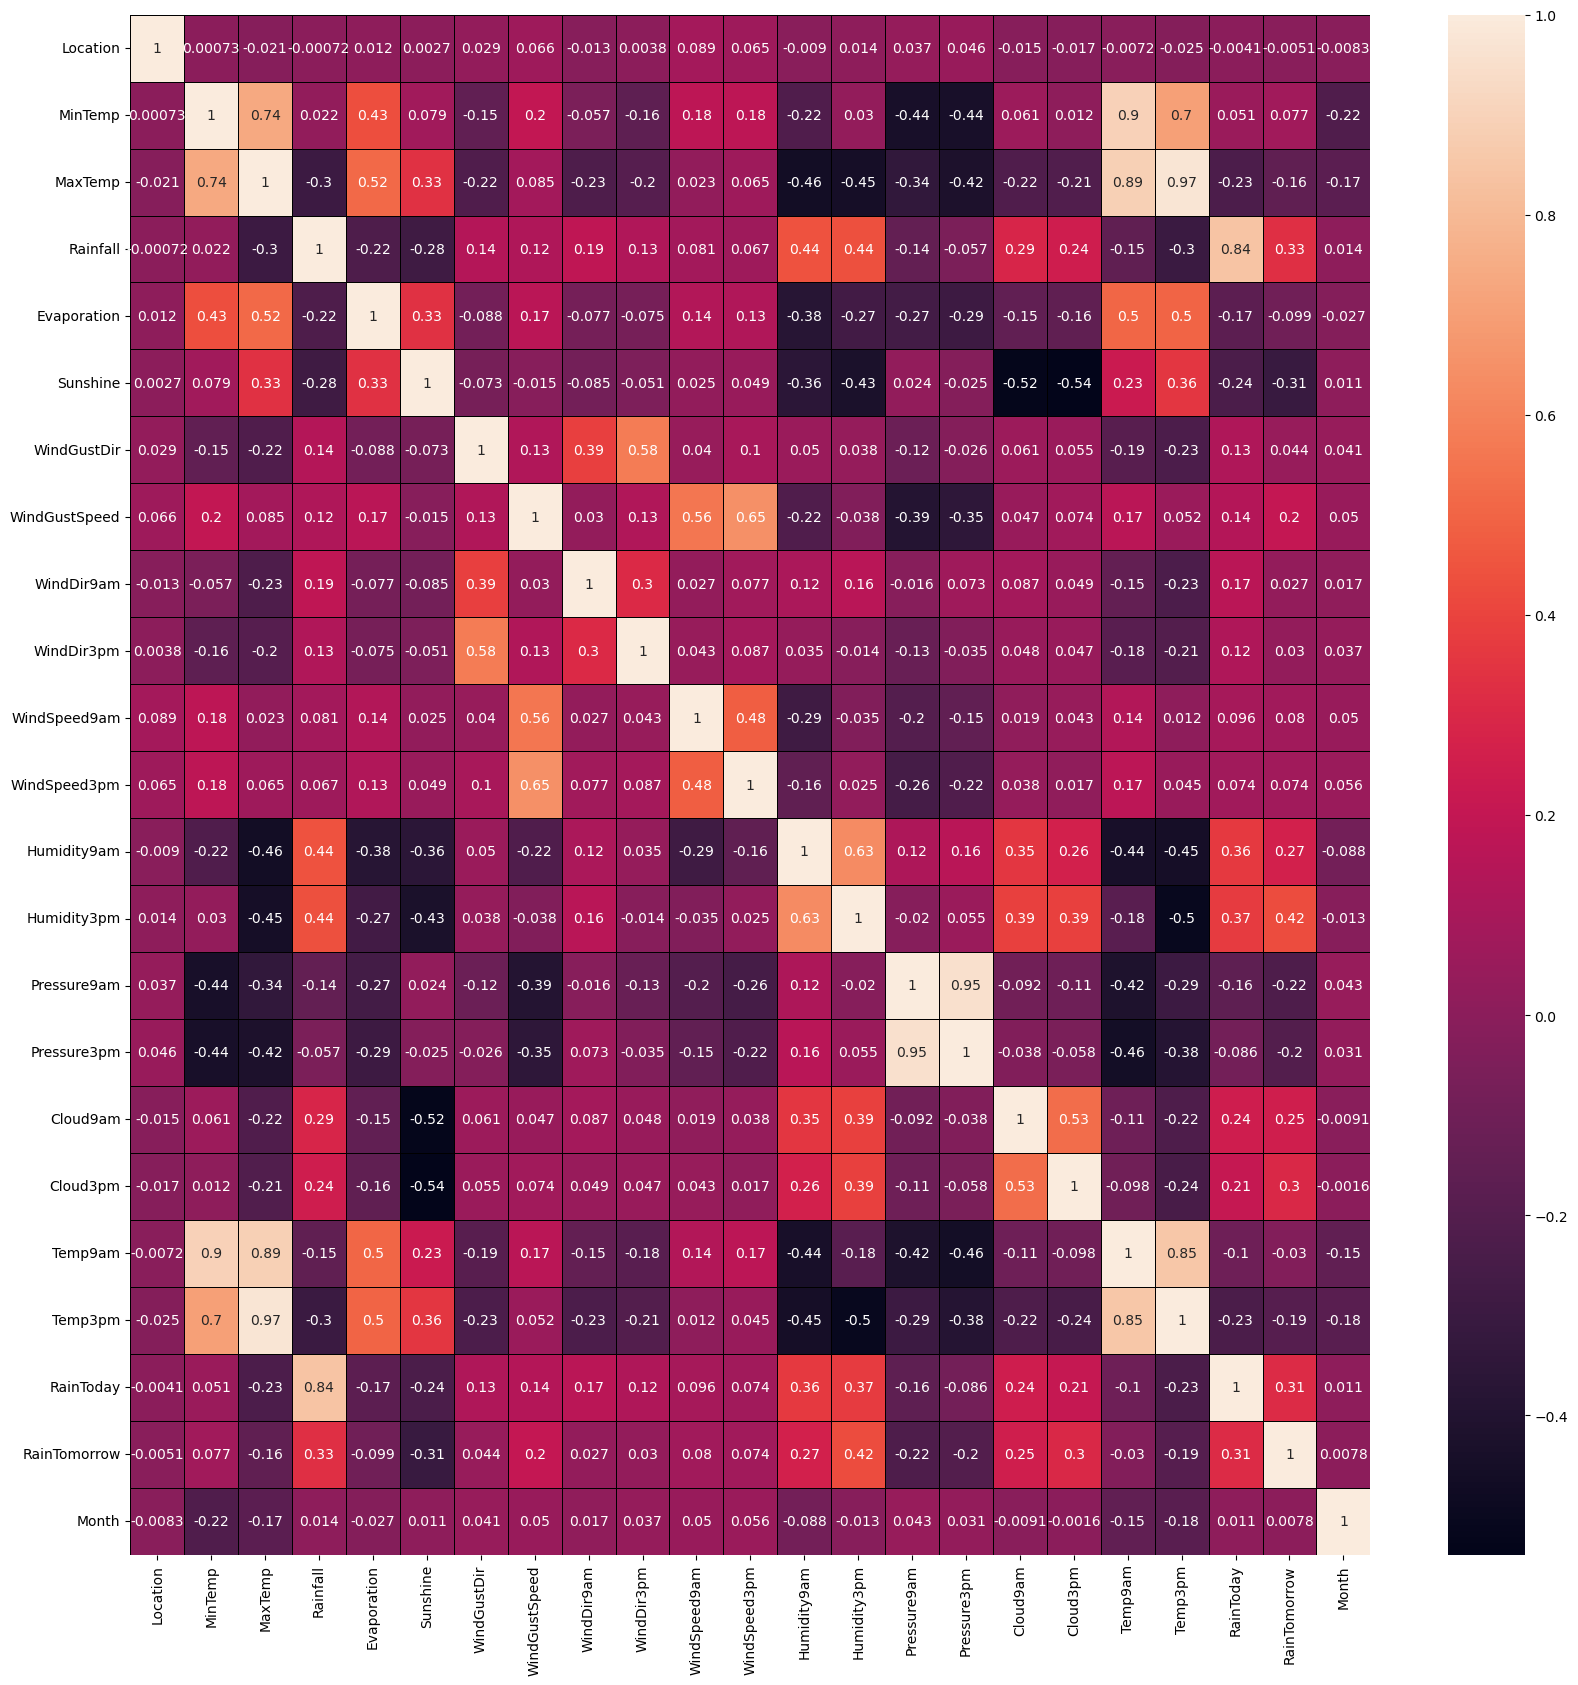

In [10]:
fig = plt.figure(figsize=(20, 20))
corr = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr, linecolor='black', linewidths=0.5, annot=True)

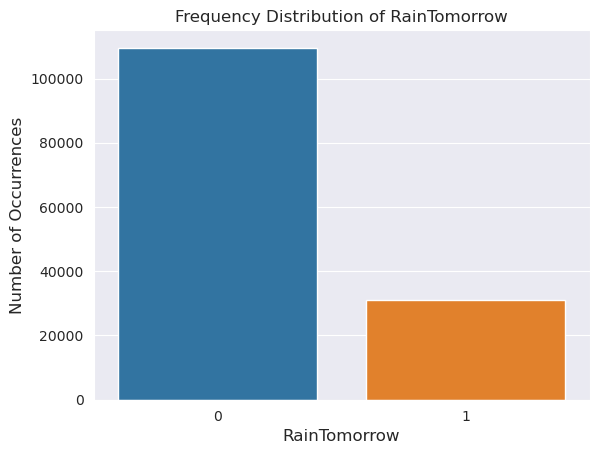

In [11]:
raintomorrow_count = df['RainTomorrow'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintomorrow_count.index, y=raintomorrow_count.values)
plt.title('Frequency Distribution of RainTomorrow')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()

<Axes: ylabel='Temp3pm'>

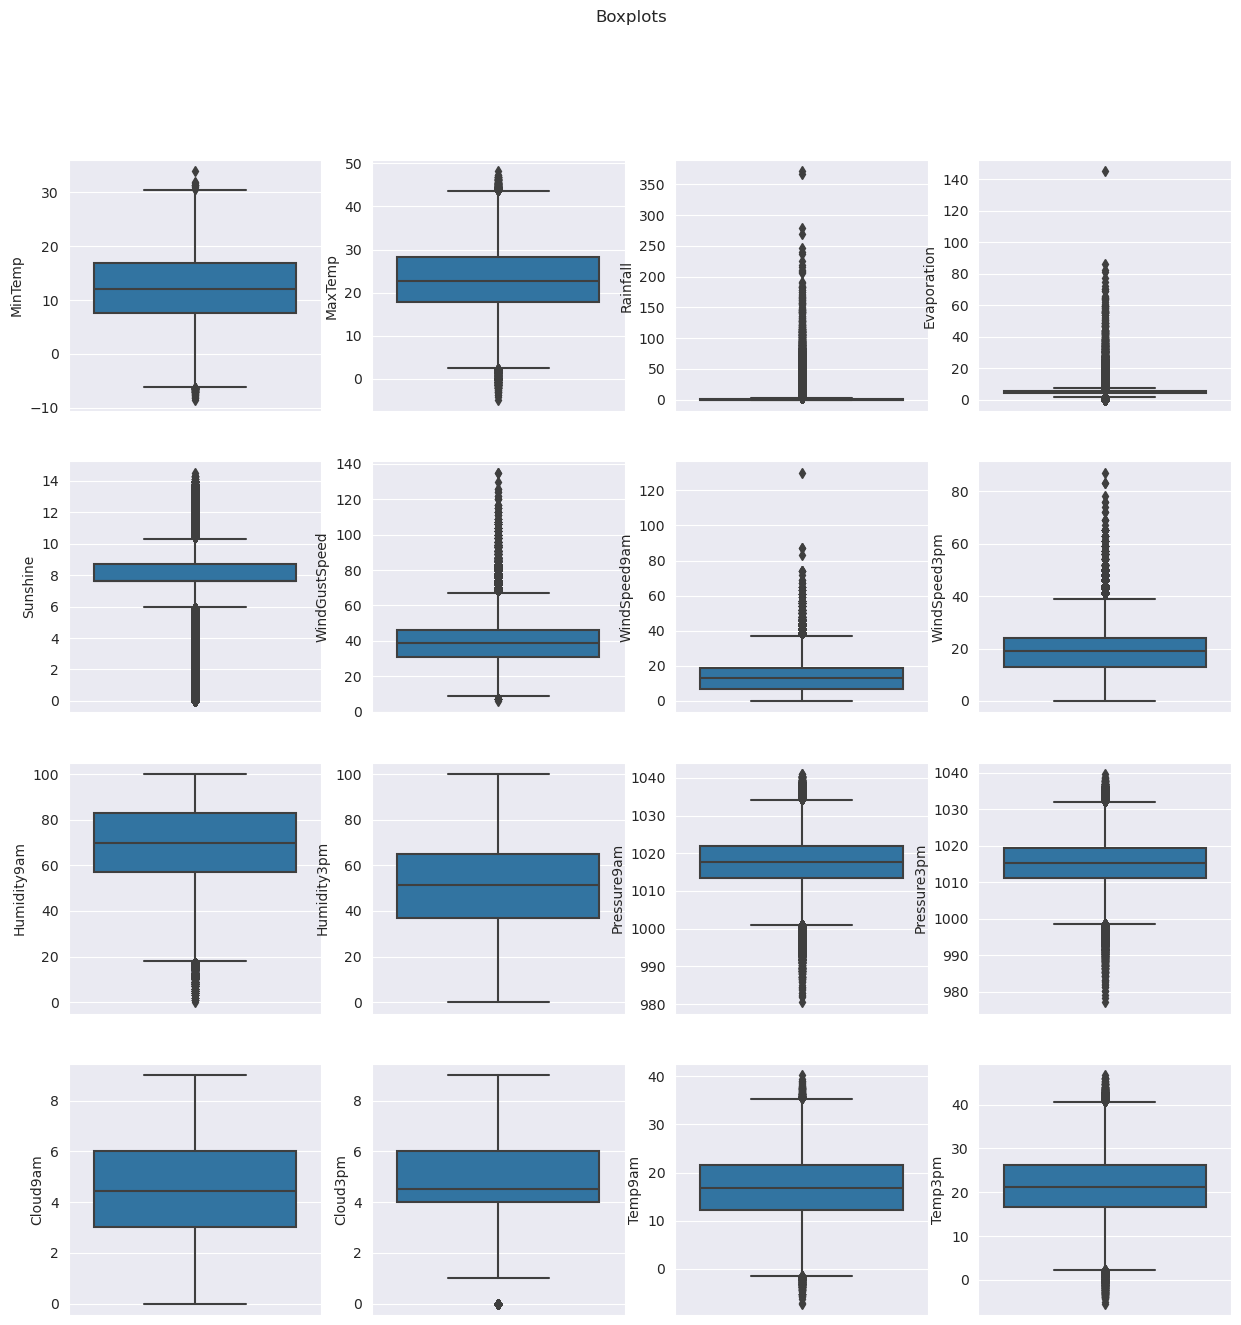

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["MinTemp"], ax=axs[0,0])
sns.boxplot(y=df["MaxTemp"], ax=axs[0,1])
sns.boxplot(y=df["Rainfall"], ax=axs[0,2])
sns.boxplot(y=df["Evaporation"], ax=axs[0,3])
sns.boxplot(y=df["Sunshine"], ax=axs[1,0])
sns.boxplot(y=df["WindGustSpeed"], ax=axs[1,1])
sns.boxplot(y=df["WindSpeed9am"], ax=axs[1,2])
sns.boxplot(y=df["WindSpeed3pm"], ax=axs[1,3])
sns.boxplot(y=df["Humidity9am"], ax=axs[2,0])
sns.boxplot(y=df["Humidity3pm"], ax=axs[2,1])
sns.boxplot(y=df["Pressure9am"], ax=axs[2,2])
sns.boxplot(y=df["Pressure3pm"], ax=axs[2,3])
sns.boxplot(y=df["Cloud9am"], ax=axs[3,0])
sns.boxplot(y=df["Cloud3pm"], ax=axs[3,1])
sns.boxplot(y=df["Temp9am"], ax=axs[3,2])
sns.boxplot(y=df["Temp3pm"], ax=axs[3,3])